This notebook explores the FMNIST dataset in Keras.

In [ ]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

(60000, 28, 28)
uint8
(55000, 28, 28)
(10000, 28, 28)
(5000, 28, 28)


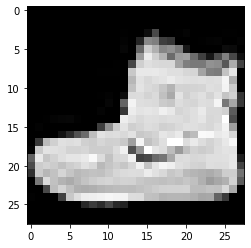

9
Ankle boot


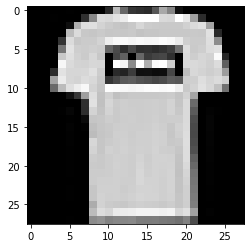

0
T-shirt/top


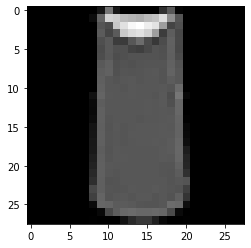

0
T-shirt/top


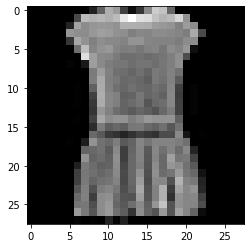

3
Dress


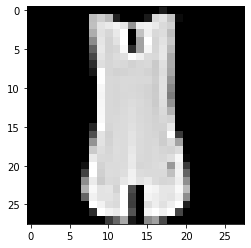

0
T-shirt/top


In [15]:
print(X_train_full.shape)
print(X_train_full.dtype)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# print(X_train_full[0])

for k in range(5):
  plt.imshow(X_train_full[k],cmap="gray")
  plt.show()
  print(y_train_full[k])
  print(class_names[y_train_full[k]])

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

print(model.summary())

# there are model characteristics to show

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7181 - accuracy: 0.7679 - val_loss: 0.5088 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4812 - accuracy: 0.8333 - val_loss: 0.4352 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4381 - accuracy: 0.8477 - val_loss: 0.4170 - val_accuracy: 0.8562
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4109 - accuracy: 0.8565 - val_loss: 0.4135 - val_accuracy: 0.8578
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3920 - accuracy: 0.8626 - val_loss: 0.3878 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3762 - accuracy: 0.8683 - val_loss: 0.3702 - val_accuracy: 0.8732
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3637 - accuracy: 0.8725 - val_loss: 0.3816 - val_accuracy:

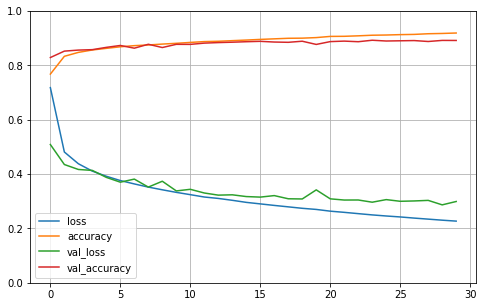

In [13]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0.   0.   0.   0.   0.   0.01 0.   0.02 0.   0.97]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
